In [ ]:
from logging import warning
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import pandas as pd
import numpy as np
from numpy.ma.core import size
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from scipy.stats.mstats import trim

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
tongkol = "https://docs.google.com/spreadsheets/d/1-Wm-QvMTw2Fve-wttNOr4NHfDseAqmjg/edit?usp=sharing&ouid=109777427362824163419&rtpof=true&sd=true".split("/")[-2]
tongkol = drive.CreateFile({'id':tongkol})
tongkol.GetContentFile('tongkol_jabar.xlsx')

In [ ]:
data = 'tongkol_jabar.xlsx'
main_file = pd.ExcelFile(data)
sheets = main_file.sheet_names
print(sheets)

['cianjur', 'cirebon', 'garut', 'indramayu', 'karawang', 'pangandaran', 'subang', 'sukabumi', 'tasikmalaya']


# Data Understanding 

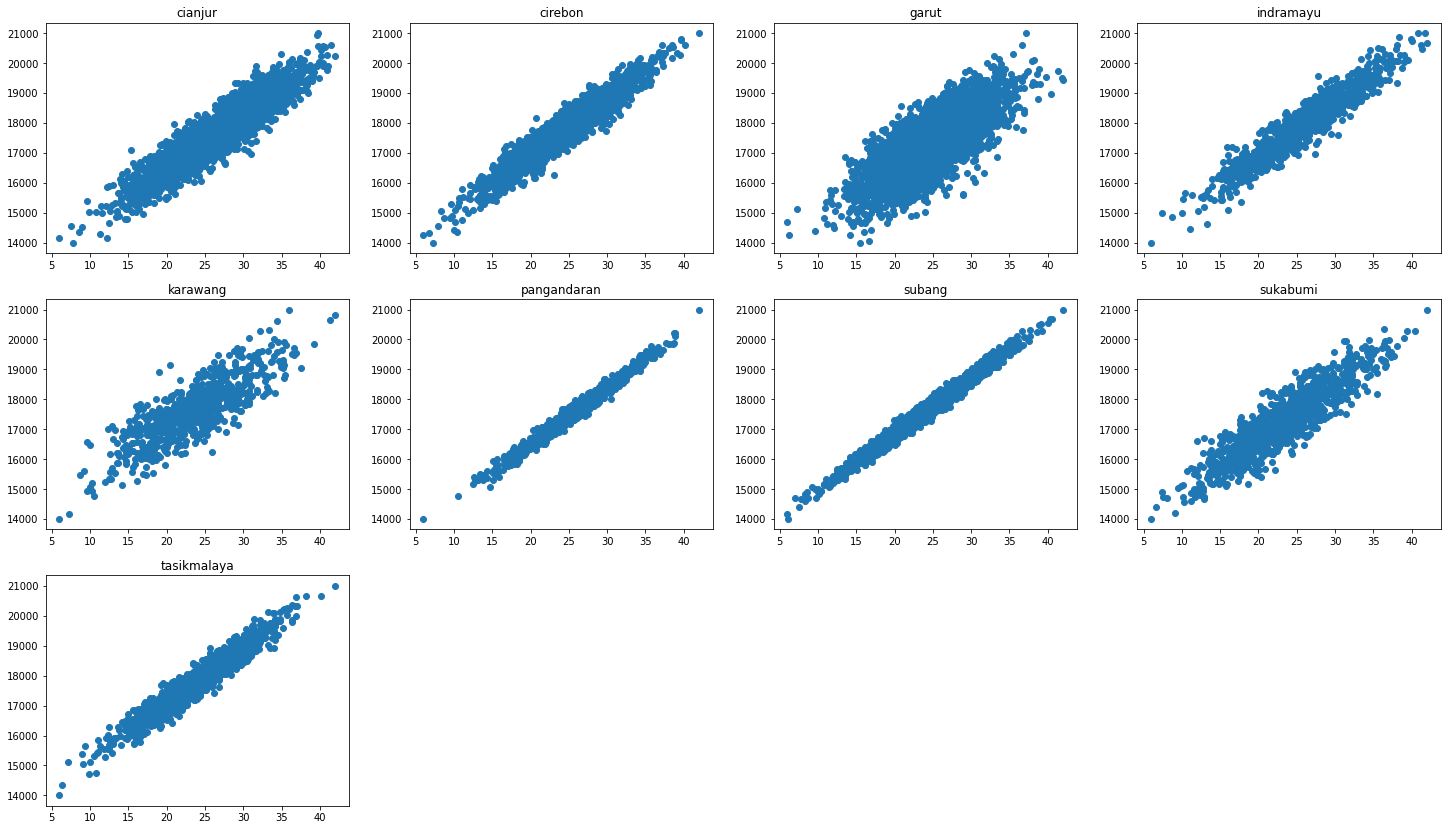

In [ ]:
a = 0
plt.figure(figsize=(25, 50))
for sheet in sheets:
  a+=1
  df = pd.read_excel(data, sheet_name=sheet)
  plt.subplot(10, 4, a)
  plt.scatter(data=df, x="bakul", y="harga_perkilo")
  plt.title(sheet)
plt.show()

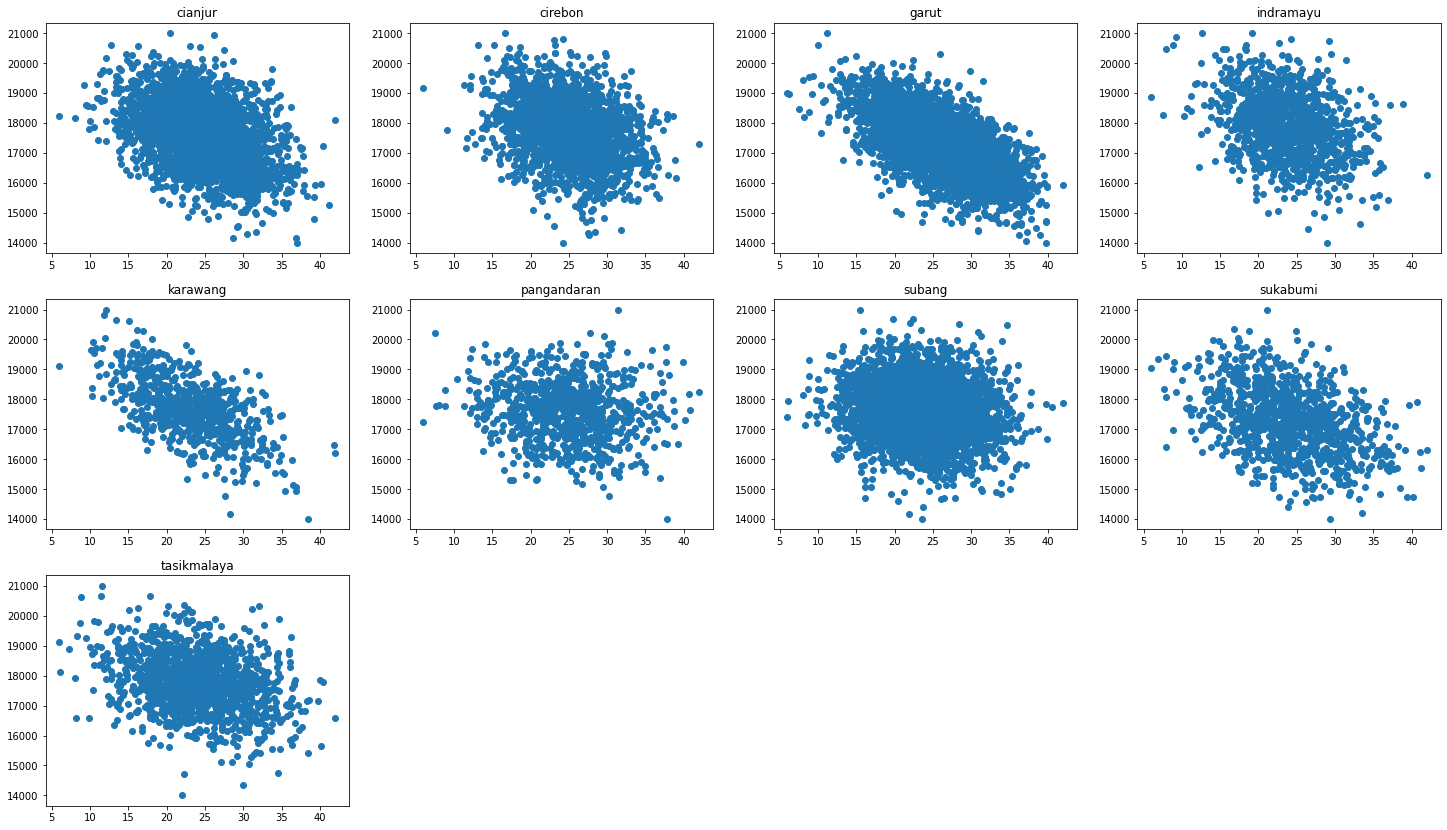

In [ ]:
a = 0
plt.figure(figsize=(25, 50))
for sheet in sheets:
  a+=1
  df = pd.read_excel(data, sheet_name=sheet)
  plt.subplot(10, 4, a)
  plt.scatter(data=df, x="hasil_tangkap", y="harga_perkilo")
  plt.title(sheet)
plt.show()

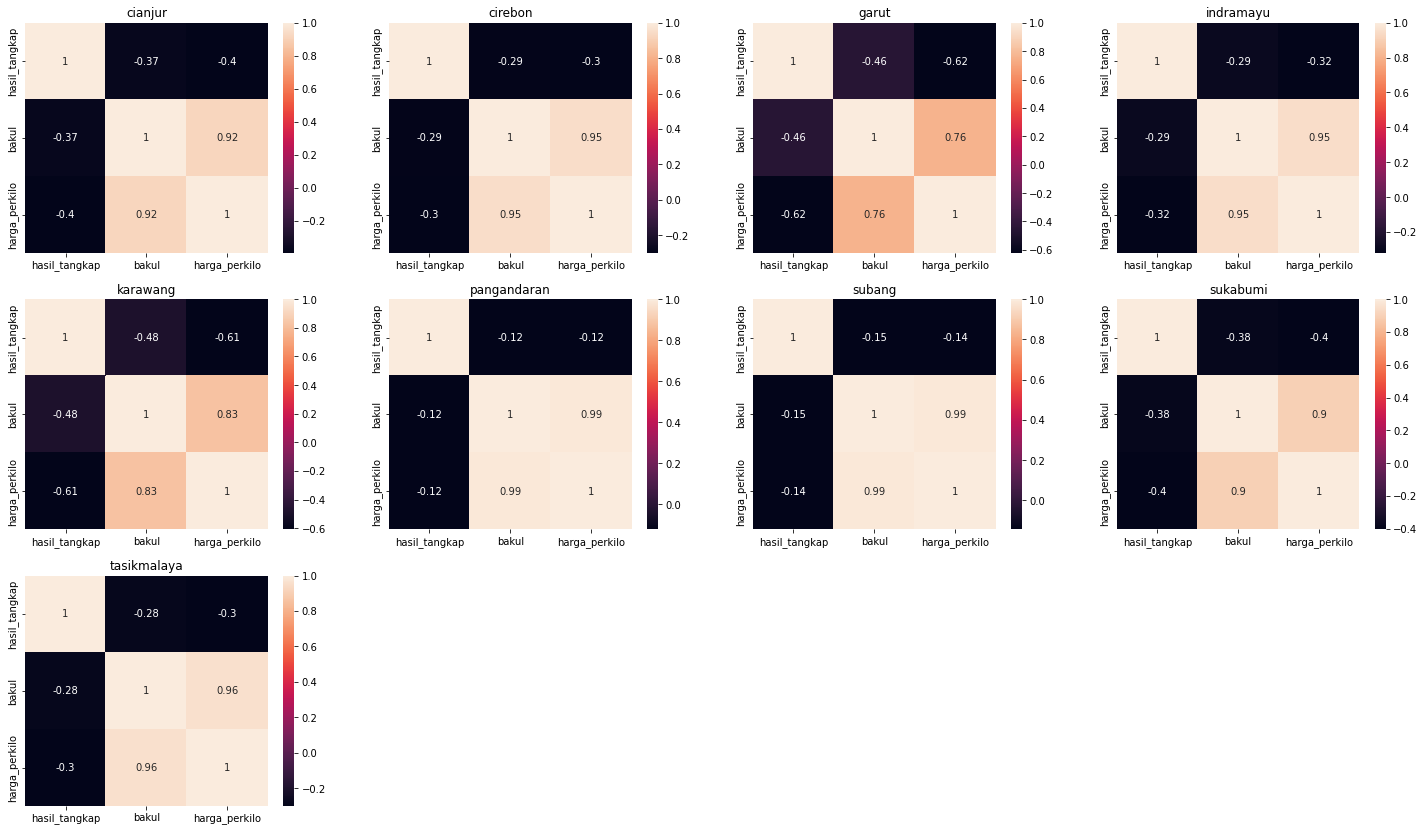

In [ ]:
a = 0
plt.figure(figsize=(25, 50))
for sheet in sheets:
  a+=1
  df = pd.read_excel(data, sheet_name=sheet)
  plt.subplot(10, 4, a)
  sns.heatmap(df.corr(), annot=True, cbar=True)
  plt.title(sheet)
plt.show()

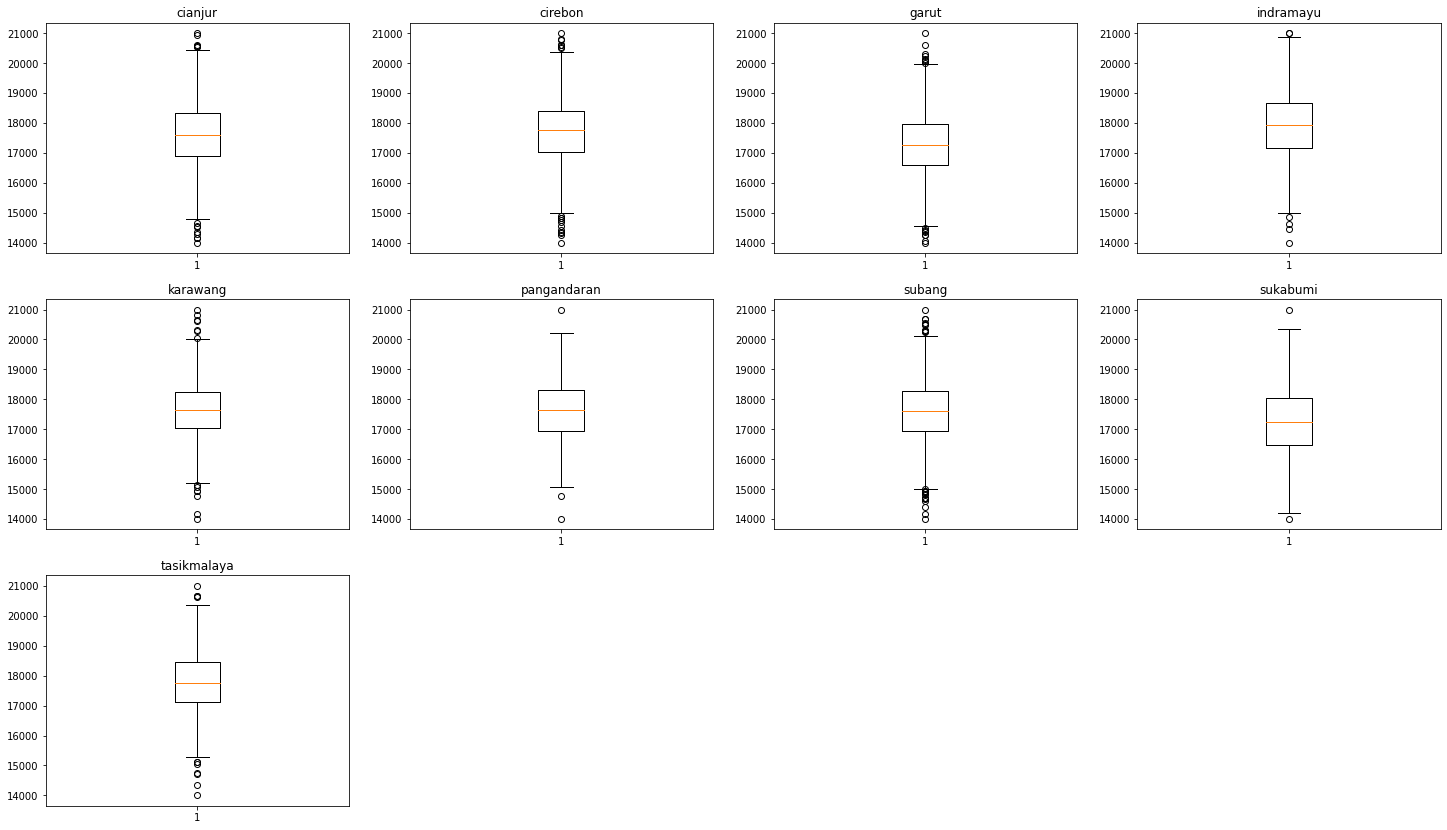

In [ ]:
main_file = pd.ExcelFile(data)
sheets = main_file.sheet_names
a = 0

plt.figure(figsize=(25, 50))
for sheet in sheets:
  a+=1
  df = pd.read_excel(data, sheet_name=sheet)
  plt.subplot(10, 4, a)
  plt.boxplot(data=df, x="harga_perkilo")
  plt.title(sheet)
plt.show()

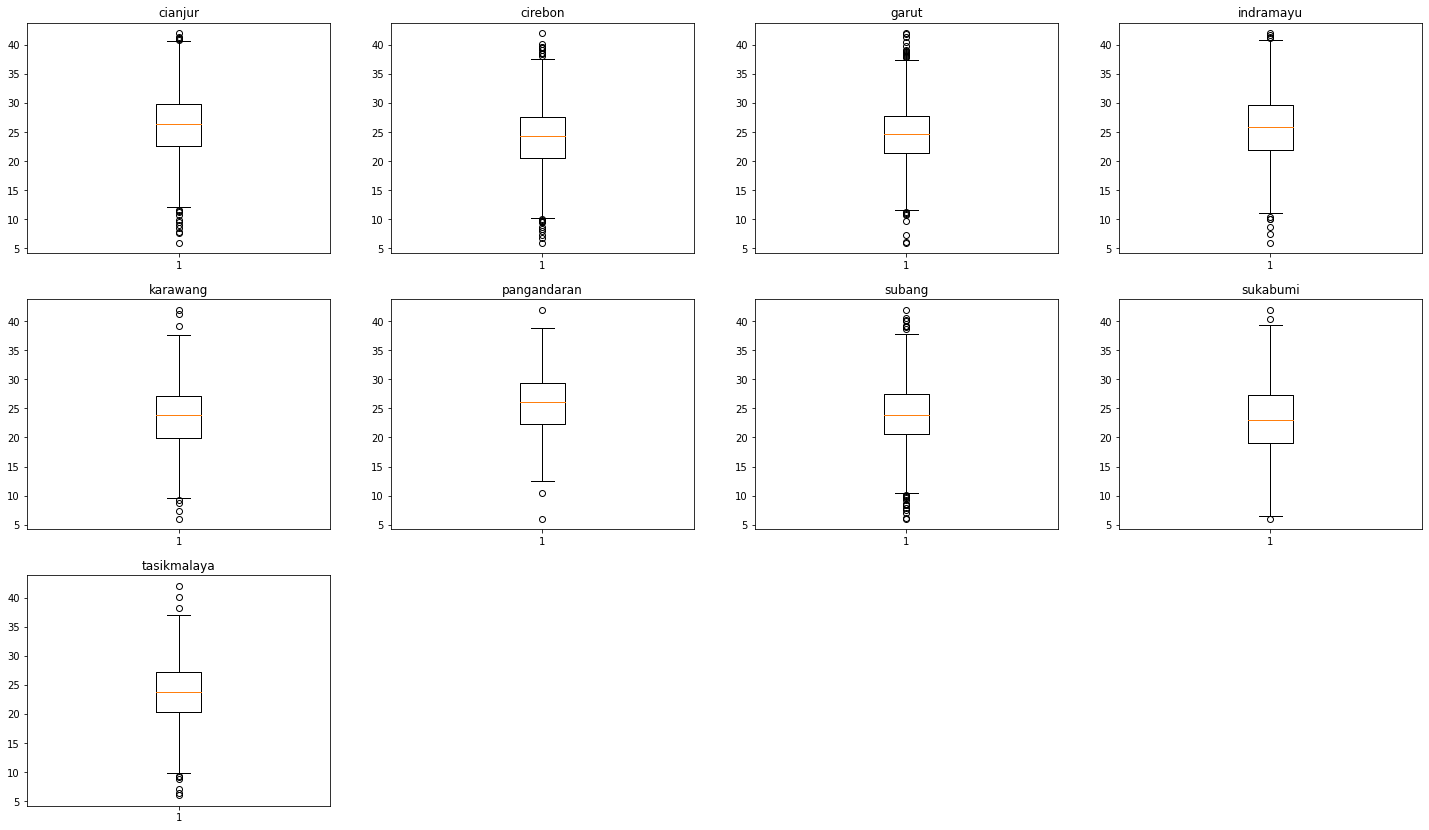

In [ ]:
main_file = pd.ExcelFile(data)
sheets = main_file.sheet_names
a = 0

plt.figure(figsize=(25, 50))
for sheet in sheets:
  a+=1
  df = pd.read_excel(data, sheet_name=sheet)
  plt.subplot(10, 4, a)
  plt.boxplot(data=df, x="bakul")
  plt.title(sheet)
plt.show()

# Data Preprocessing

In [ ]:
!rm -r 'perkab'

In [ ]:
! mkdir 'perkab'

mkdir: cannot create directory ‘perkab’: File exists


In [ ]:
data = 'tongkol_jabar.xlsx'

for sheet in sheets:
  df = pd.read_excel(data, sheet_name=sheet)
  column = ["hasil_tangkap", "bakul", "harga_perkilo"]

  scaler = StandardScaler()
  MinMax = MinMaxScaler(feature_range=(0, 1))

  df[["hasil_tangkap", "bakul", "harga_perkilo"]] = scaler.fit_transform(df[["hasil_tangkap", "bakul", "harga_perkilo"]])
  df[["hasil_tangkap", "bakul", "harga_perkilo"]] = MinMax.fit_transform(df[["hasil_tangkap", "bakul", "harga_perkilo"]])

  df.dropna(axis=0, inplace=True)

  df.to_excel(f'perkab/{sheet}.xlsx', index=False)

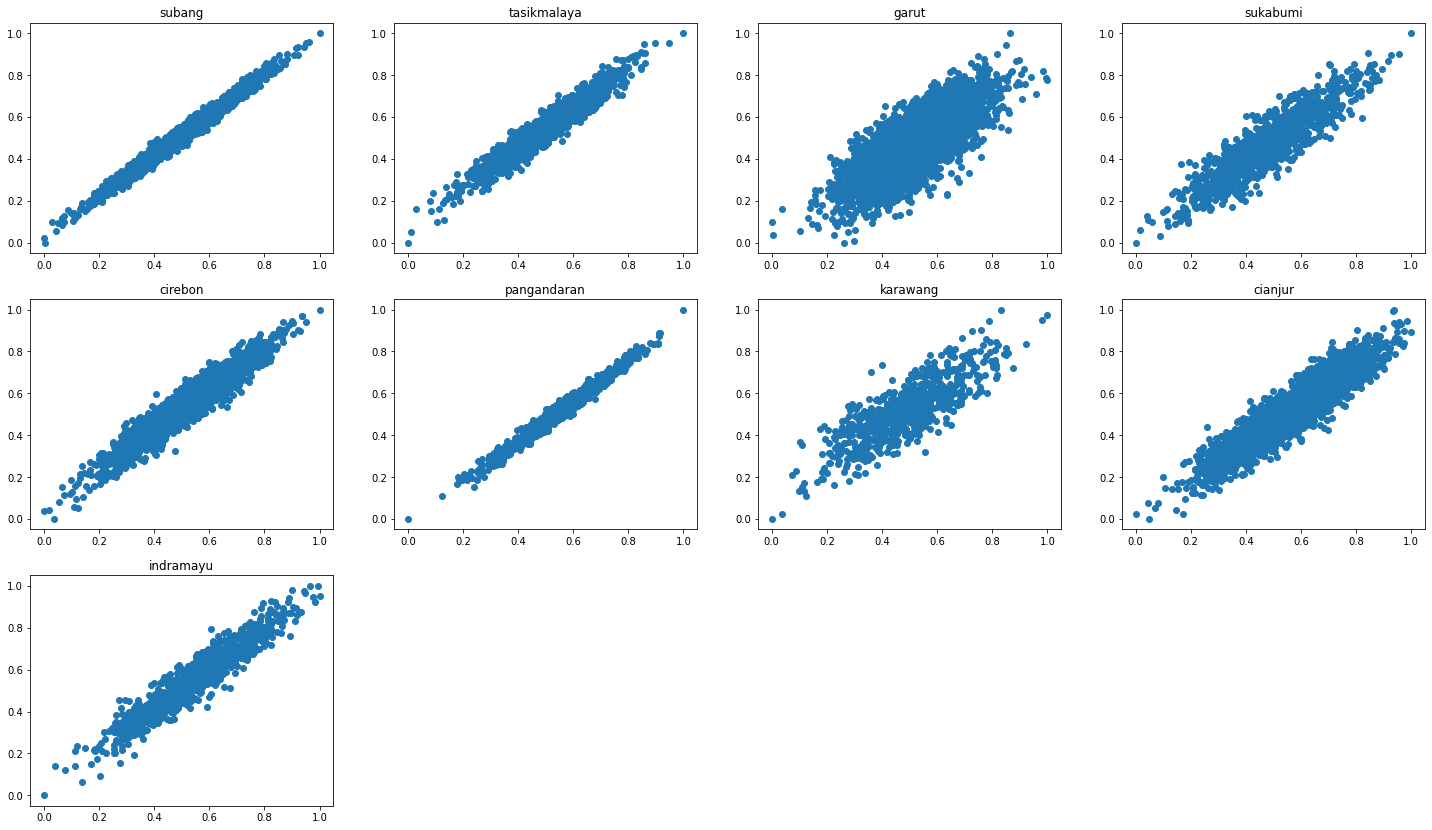

In [ ]:
files_perkab = [os.path.splitext(filename)[0] for filename in os.listdir('perkab')]
a = 0

plt.figure(figsize=(25, 50))
for i in files_perkab:
  a+=1
  test_data = pd.read_excel(f'perkab/{i}.xlsx')
  plt.subplot(10, 4, a)
  plt.scatter(data=test_data, x="bakul", y="harga_perkilo")
  plt.title(i)
plt.show()

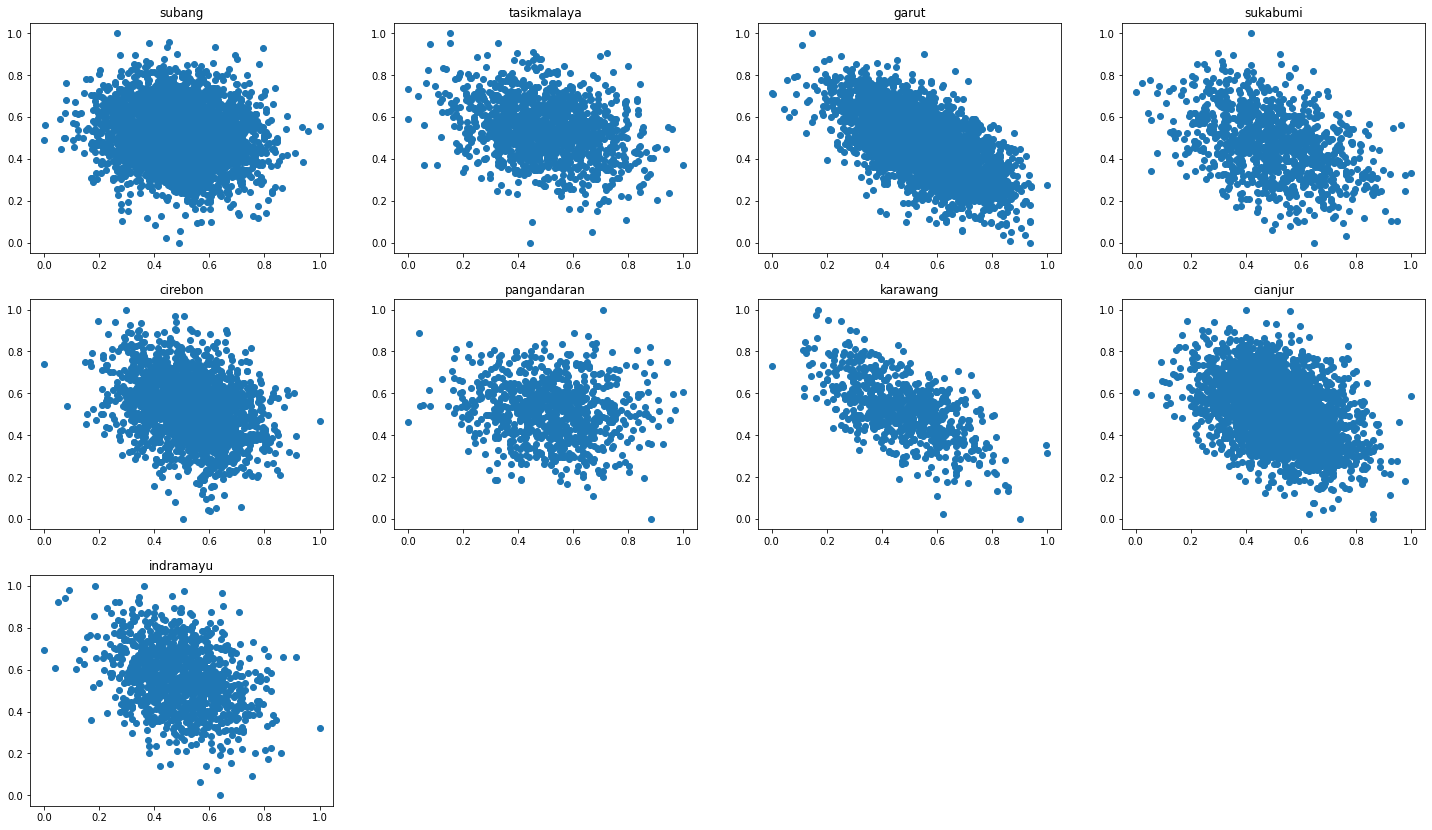

In [ ]:
files_perkab = [os.path.splitext(filename)[0] for filename in os.listdir('perkab')]
a = 0

plt.figure(figsize=(25, 50))
for i in files_perkab:
  a+=1
  test_data = pd.read_excel(f'perkab/{i}.xlsx')
  plt.subplot(10, 4, a)
  plt.scatter(data=test_data, x="hasil_tangkap", y="harga_perkilo")
  plt.title(i)
plt.show()

# Create Model

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.losses import MeanSquaredError as MSE
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError as MAE
from tensorflow.keras.models import load_model

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=2))
model.add(Dense(8))
model.add(Dense(1))

model.compile(loss=MSE(), optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
! mkdir 'saved_model'

mkdir: cannot create directory ‘saved_model’: File exists


In [ ]:
files_perkab = [os.path.splitext(filename)[0] for filename in os.listdir('perkab')]
a = 0

for i in files_perkab:
  df = pd.read_excel(f'perkab/{i}.xlsx')

  X = df[["hasil_tangkap", 'bakul']].to_numpy()
  y = df["harga_perkilo"].to_numpy()
  y = y.reshape(-1, 1)

  print(i)
  history = model.fit(X, y, epochs=25 , batch_size=4, validation_split=0.2)
  history.model.save(f'saved_model/{i}.h5')

subang
Epoch 1/25
649/649 [==============================] - 2s 2ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0081 - val_mean_squared_error: 0.0081
Epoch 2/25
649/649 [==============================] - 1s 2ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 3/25
649/649 [==============================] - 1s 2ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 4/25
649/649 [==============================] - 1s 2ms/step - loss: 8.4969e-04 - mean_squared_error: 8.4969e-04 - val_loss: 8.4333e-04 - val_mean_squared_error: 8.4333e-04
Epoch 5/25
649/649 [==============================] - 1s 2ms/step - loss: 4.8224e-04 - mean_squared_error: 4.8224e-04 - val_loss: 4.3123e-04 - val_mean_squared_error: 4.3123e-04
Epoch 6/25
649/649 [==============================] - 1s 2ms/step - loss: 3.9527e-04 - mean_squared_error: 3.9527e-04 - val_loss: 3.9469e-04 - val_mean

In [ ]:
import shutil
from google.colab import files

shutil.make_archive("model_harga_tongkol", 'zip', "saved_model")
files.download(f'model_harga_tongkol.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>